<a href="https://colab.research.google.com/github/john-hafner/PHY451-Muon/blob/main/Decay_Counts_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decay Count Rate Analysis
Pull up one or more files, and calculate the count rate both of detected decays, and candidate muons that did not get a 2nd signal.  We'll want to use that to get some idea of what the background is, and where is the best voltage threshold to block it out.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# Gets to base of your google drive
base = 'drive/My Drive'
# Specific folder the data is stored in, may be multiple levels in
folder = 'PHY451 - Muons/Our Data'
# file name
file = 'muon_3-14-23.data'

df = pd.read_csv(base + '/' + folder + '/' + file, delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
#df = pd.read_csv('drive/My Drive/PHY451 - Muons/Our Data/muon_3-14-23.data', delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
print(f'Loaded {df.shape[0]} records')
df.head(5)

Loaded 8321311 records


,decay_time,timestamp
0,40000,2023-02-28 16:47:15
1,40000,2023-02-28 16:47:16
2,40000,2023-02-28 16:47:17
3,40000,2023-02-28 16:47:18
4,40000,2023-02-28 16:47:19


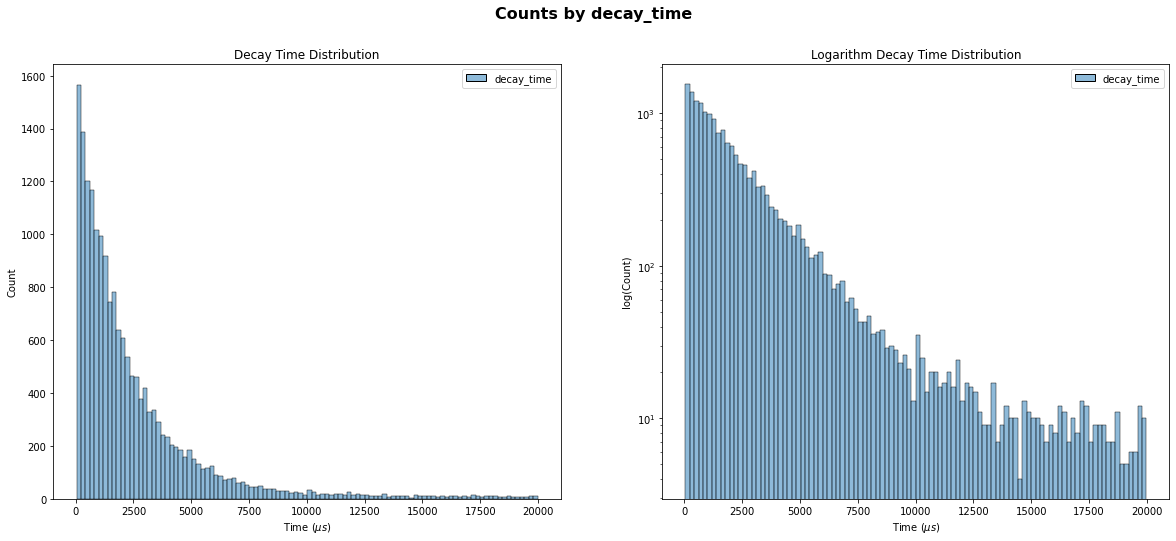

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

fig.suptitle('Counts by decay_time', fontsize=16, fontweight='bold')
sns.histplot(data=df[df['decay_time'] < 20000], ax=ax[0])
ax[0].set_title('Decay Time Distribution')
ax[0].set_xlabel('Time $(\mu s)$')
ax[0].set_ylabel('Count')

ax[1].set_title('Logarithm Decay Time Distribution')
ax[1].set_yscale('log')
ax[1].set_xlabel('Time $(\mu s)$')
ax[1].set_ylabel('log(Count)')
sns.histplot(data=df[df['decay_time'] < 20000], ax=ax[1])
plt.show()

It looks like it flatlines past 15000, maybe 12500, especially on the logarithm scaled plot so an initial guess at background would be the counts in that range, getting the average and subtracting that from the rest of the bins.

In [20]:
bg_df = df[(df['decay_time'] < 20000) & (df['decay_time'] > 15000)]
bg_df.head()

,decay_time,timestamp
15175,16200,2023-02-28 17:23:43
95168,19940,2023-02-28 20:34:53
153678,16520,2023-02-28 22:53:50
154785,16020,2023-02-28 22:56:26
184035,16960,2023-03-01 00:06:57


In [31]:
bg_df.mean()

<ipython-input-31-e2fb2589dc4b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  bg_df.mean()


decay_time    17387.947598
dtype: float64

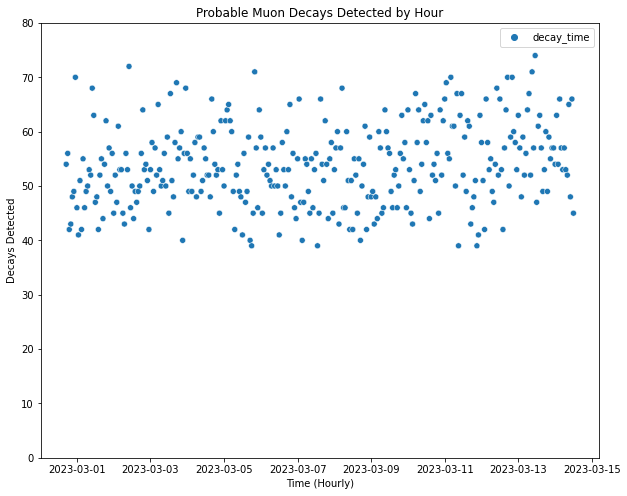

In [14]:
plt.figure(figsize=(10,8))
plt.xlabel('Time (Hourly)')
plt.ylabel('Decays Detected')
#plt.ylim(bottom=0)
ax = plt.gca()
ax.set_ylim([0, 80])
sns.scatterplot(df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:-1])
plt.title('Probable Muon Decays Detected by Hour')
plt.show()

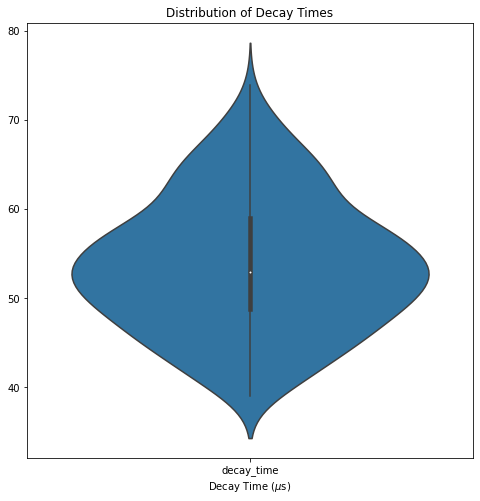

In [16]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Decay Times')
sns.violinplot(data=df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:-1])
plt.xlabel('Decay Time ($\mu$s)')
plt.show()

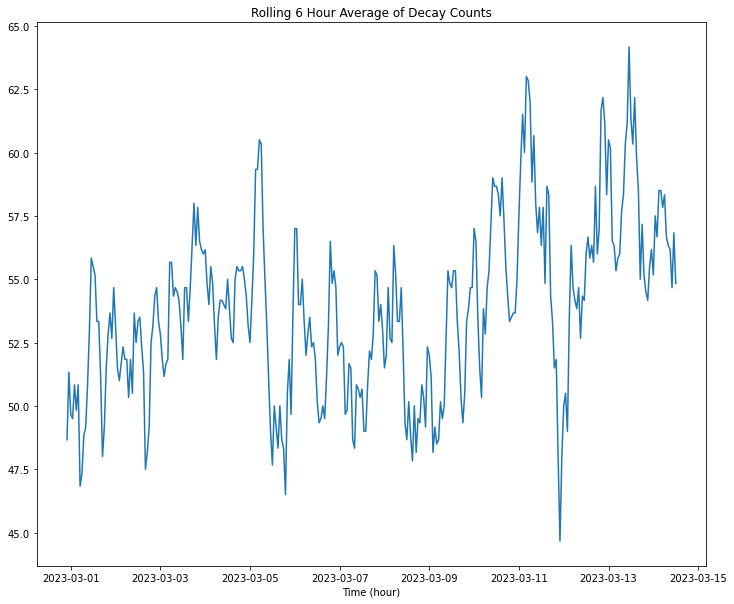

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:-1].rolling(window=6).mean())
#plt.plot(df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:48])
plt.xlabel('Time (hour)')
plt.title('Rolling 6 Hour Average of Decay Counts')
plt.show()

In [ ]:
hourly_df = df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:-1]
hourly_df.head(5)

,decay_time
timestamp,
2023-02-28 17:00:00,54
2023-02-28 18:00:00,56
2023-02-28 19:00:00,42
2023-02-28 20:00:00,43
2023-02-28 21:00:00,48


In [15]:
#hourly_df.groupby(hourly_df.index.hour).describe()
hourly_df['hour'] = hourly_df.index.hour
plt.figure(figsize=(18,10))
plt.title('Distribution of Decays by Hour')
sns.boxplot(data=hourly_df, x='hour', y='decay_time')
plt.show()

NameError: ignored

In [ ]:
#df['type'] = '20k' if df['decay_time'] == 20000 else 'other'
# df.loc[df['decay_time'] < 20000, 'type'] = 'decay'
# df.loc[df['decay_time'] == 20000, 'type'] = '20k'
# df.loc[df['decay_time'] > 20000, 'type'] = '40k'
# df.head(5)

In [ ]:
#sns.violinplot(data=df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:-1])
df.set_index('timestamp').resample('H').count()

,decay_time
timestamp,
2023-02-28 16:00:00,5259
2023-02-28 17:00:00,25052
2023-02-28 18:00:00,25095
2023-02-28 19:00:00,25217
2023-02-28 20:00:00,25074
...,...
2023-03-14 09:00:00,24954
2023-03-14 10:00:00,24660
2023-03-14 11:00:00,24770


In [ ]:
#df.drop('decay_time', axis=1).set_index('timestamp').resample('H').count()
#df.set_index('timestamp')['type'].resample('H').count()

In [ ]:
hourly_20k = df[df['decay_time']==20000].set_index('timestamp').resample('H').count()[1:-1]
hourly_40k = df[df['decay_time']>20000].set_index('timestamp').resample('H').count()[1:-1]

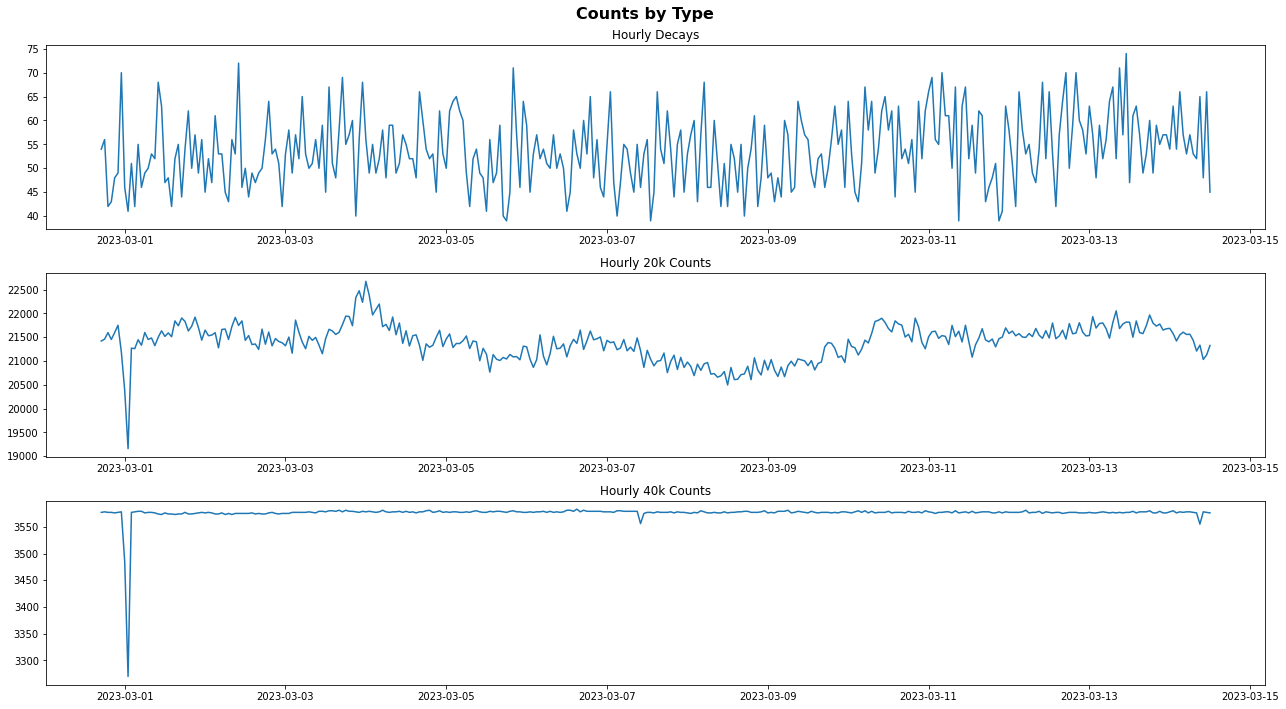

In [ ]:
#plt.figure(figsize=(12,10))
fig, ax = plt.subplots(3, 1, figsize=(18,10))
ax[0].plot(hourly_df.drop('hour', axis=1))
ax[0].set_title('Hourly Decays')
ax[1].plot(hourly_20k)
ax[1].set_title('Hourly 20k Counts')
ax[2].plot(hourly_40k)
ax[2].set_title('Hourly 40k Counts')
fig.suptitle('Counts by Type', fontsize=16, fontweight='bold')#, y=0.95)
#plt.plot(df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:48])
#plt.xlabel('Time (hour)')
fig.tight_layout()
#plt.title('Rolling 6 Hour Average of Decay Counts')
plt.show()

In [ ]:
hourly_df.head(5)

,decay_time,hour
timestamp,,
2023-02-28 17:00:00,54,17
2023-02-28 18:00:00,56,18
2023-02-28 19:00:00,42,19
2023-02-28 20:00:00,43,20
2023-02-28 21:00:00,48,21


# Muon Counts by Voltage
We'll try adjusting the high voltage on the detector, and the discriminator voltage independently and see what impact this has on the counts for the detector.

In [ ]:
df_1 = pd.read_csv('drive/My Drive/PHY451 - Muons/Our Data/muon_1150HV_278D.data', delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'], unit='s')
df_1.head(5)

,decay_time,timestamp
0,40000,2023-03-14 22:33:11
1,40000,2023-03-14 22:33:12
2,20000,2023-03-14 22:33:12
3,20000,2023-03-14 22:33:12
4,20000,2023-03-14 22:33:12


Text(0, 0.5, 'Incident $\\mu$')

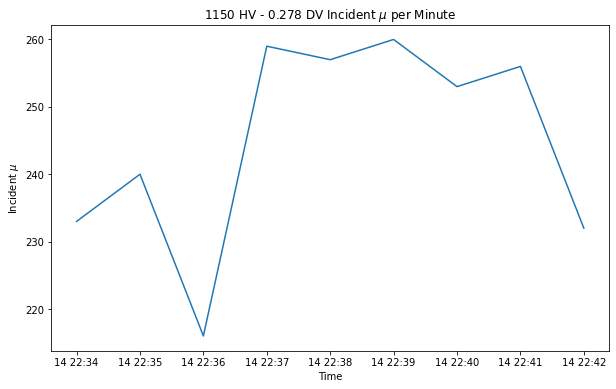

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_1[df_1['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1])
plt.title('1150 HV - 0.278 DV Incident $\mu$ per Minute')
plt.xlabel('Time')
plt.ylabel('Incident $\mu$')

In [ ]:
df_1[df_1['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1].describe()
# 1241HV_278D
# 1201HV_278D

,decay_time
count,9.000000
mean,245.111111
std,15.527753
min,216.000000
25%,233.000000
50%,253.000000
75%,257.000000
max,260.000000


In [ ]:
df_2 = pd.read_csv('drive/My Drive/PHY451 - Muons/Our Data/muon_1201HV_278D.data', delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
df_2['timestamp'] = pd.to_datetime(df_2['timestamp'], unit='s')
df_3 = pd.read_csv('drive/My Drive/PHY451 - Muons/Our Data/muon_1241HV_278D.data', delim_whitespace=True, names=['decay_time', 'timestamp'], header=None)
df_3['timestamp'] = pd.to_datetime(df_3['timestamp'], unit='s')
df_2.head(5)
#df_2.head(5)

,decay_time,timestamp
0,40000,2023-03-14 22:47:28
1,40000,2023-03-14 22:47:29
2,20000,2023-03-14 22:47:29
3,20000,2023-03-14 22:47:29
4,20000,2023-03-14 22:47:29


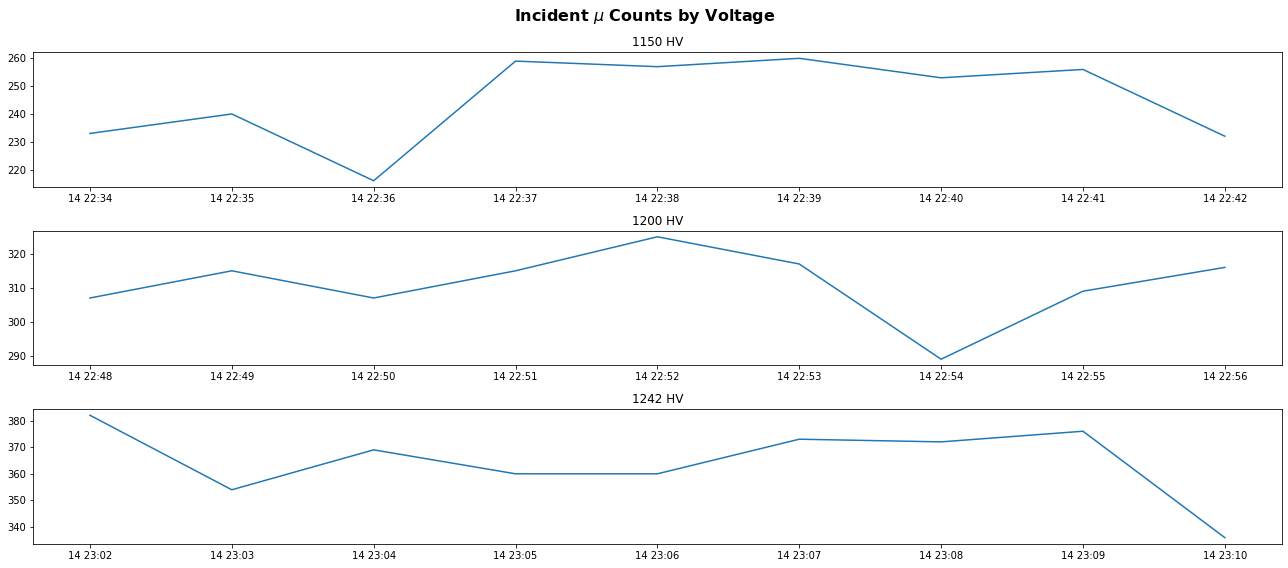

In [ ]:
#plt.figure(figsize=(12,10))
fig, ax = plt.subplots(3, 1, figsize=(18,8))
ax[0].plot(df_1[df_1['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1])
ax[0].set_title('1150 HV')
#ax[1].plot(hourly_20k)
ax[1].plot(df_2[df_2['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1])
ax[1].set_title('1200 HV')
#ax[2].plot(hourly_40k)
ax[2].plot(df_3[df_3['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1])
ax[2].set_title('1242 HV')
fig.suptitle('Incident $\mu$ Counts by Voltage', fontsize=16, fontweight='bold')#, y=0.95)
#plt.plot(df[df['decay_time'] < 20000].set_index('timestamp').resample('H').count()[1:48])
#plt.xlabel('Time (hour)')
fig.tight_layout()
#plt.title('Rolling 6 Hour Average of Decay Counts')
plt.show()

In [ ]:
df_1 = df_1[df_1['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1]
df_1.loc[:, 'HV'] = 1150
df_1

,decay_time,HV
timestamp,,
2023-03-14 22:34:00,233,1150
2023-03-14 22:35:00,240,1150
2023-03-14 22:36:00,216,1150
2023-03-14 22:37:00,259,1150
2023-03-14 22:38:00,257,1150
2023-03-14 22:39:00,260,1150
2023-03-14 22:40:00,253,1150
2023-03-14 22:41:00,256,1150
2023-03-14 22:42:00,232,1150


In [ ]:
df_2 = df_2[df_2['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1]
df_2.loc[:, 'HV'] = 1200
df_2

,decay_time,HV
timestamp,,
2023-03-14 22:48:00,307,1200
2023-03-14 22:49:00,315,1200
2023-03-14 22:50:00,307,1200
2023-03-14 22:51:00,315,1200
2023-03-14 22:52:00,325,1200
2023-03-14 22:53:00,317,1200
2023-03-14 22:54:00,289,1200
2023-03-14 22:55:00,309,1200
2023-03-14 22:56:00,316,1200


In [ ]:
df_3 = df_3[df_3['decay_time'] == 20000].set_index('timestamp').resample('min').count()[1:-1]
df_3.loc[:, 'HV'] = 1242
df_3

,decay_time,HV
timestamp,,
2023-03-14 23:02:00,382,1242
2023-03-14 23:03:00,354,1242
2023-03-14 23:04:00,369,1242
2023-03-14 23:05:00,360,1242
2023-03-14 23:06:00,360,1242
2023-03-14 23:07:00,373,1242
2023-03-14 23:08:00,372,1242
2023-03-14 23:09:00,376,1242
2023-03-14 23:10:00,336,1242


In [ ]:
df_tot = pd.concat((df_1, df_2, df_3), axis=0)
df_tot

,decay_time,HV
timestamp,,
2023-03-14 22:34:00,233,1150
2023-03-14 22:35:00,240,1150
2023-03-14 22:36:00,216,1150
2023-03-14 22:37:00,259,1150
2023-03-14 22:38:00,257,1150
2023-03-14 22:39:00,260,1150
2023-03-14 22:40:00,253,1150
2023-03-14 22:41:00,256,1150
2023-03-14 22:42:00,232,1150


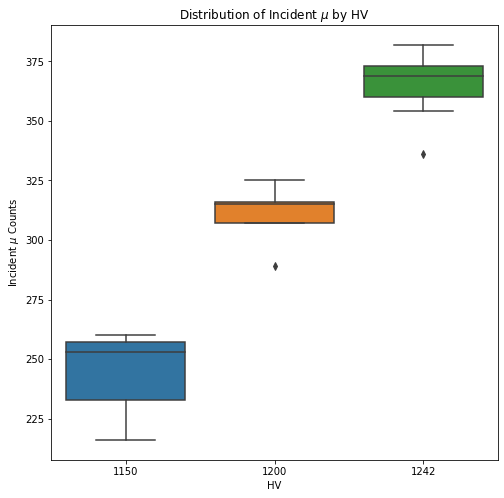

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Distribution of Incident $\mu$ by HV')
sns.boxplot(data=df_tot, x='HV', y='decay_time')
plt.ylabel('Incident $\mu$ Counts')
plt.show()